In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

# Function to load data and return the DataFrame
def load_data(file_path):
    if not os.path.exists(file_path):
        print("Error: File does not exist. Please try again.")
        return None
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    return df

# Function to prompt user for input and output power
def prompt_for_power():
    while True:
        try:
            input_power = float(input("Enter Input Power: "))
            output_power = float(input("Enter Output Power: "))
            return input_power, output_power
        except ValueError:
            print("Invalid input. Please enter numeric values.")

# Function to calculate and display evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\nModel Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-Squared (R2): {r2:.4f}")

# Function to train the model and make predictions
def train_and_predict(df):
    # Ensure required columns are present in the dataset
    required_columns = ['Voltage', 'PC', 'Torque', 'RPM', 'motor_efficiency']
    if not all(col in df.columns for col in required_columns):
        print("Error: Missing required columns in the dataset.")
        return None

    # Features and target for motor efficiency prediction
    X = df[['Voltage', 'PC', 'Torque', 'RPM']].values
    y = df['motor_efficiency'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model for efficiency prediction
    efficiency_model = MLPRegressor(
        hidden_layer_sizes=(100, 100), max_iter=1000, learning_rate='adaptive', 
        random_state=42, alpha=0.001, verbose=True, tol=1e-5
    )

    # Train the model
    print("Training the efficiency prediction model...")
    efficiency_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = efficiency_model.predict(X_test_scaled)

    # Calculate and print evaluation metrics
    calculate_metrics(y_test, y_pred)

    # Predicting the efficiency for the entire dataset
    predicted_efficiency = efficiency_model.predict(scaler.transform(X))

    # Save predicted efficiency in the dataset
    df['Predicted Efficiency'] = np.clip(predicted_efficiency, 0, 100)  # Ensure efficiency is between 0 and 100

    # Prompt for user input for additional calculations
    input_power, output_power = prompt_for_power()

    # Calculate efficiency based on user input
    efficiency = (output_power / input_power) * 100 if input_power > 0 else 0
    print(f"\nPredicted Motor Efficiency based on user input: {efficiency:.2f}%")

    return df

# Function to save the updated DataFrame
def save_data(df, output_path):
    df.to_csv(output_path, index=False)
    print(f"Updated dataset saved successfully at: {output_path}")

# Main function to run the program
def main():
    input_file_path = 'C:/Users/Ishwari/Downloads/Project_2.O.csv'  # Change this to your input file path
    output_file_path = "C:/Users/Ishwari/Downloads/output_with_efficiency.csv"  # Change this to your desired output file path

    df = load_data(input_file_path)
    if df is not None:
        updated_df = train_and_predict(df)
        if updated_df is not None:
            save_data(updated_df, output_file_path)

if __name__ == "__main__":
    main()


Data loaded successfully!
Training the efficiency prediction model...
Iteration 1, loss = 2676.96489333
Iteration 2, loss = 2585.08913370
Iteration 3, loss = 2454.97323574
Iteration 4, loss = 2261.28970726
Iteration 5, loss = 1984.93549065
Iteration 6, loss = 1626.55020382
Iteration 7, loss = 1223.30807766
Iteration 8, loss = 879.20369000
Iteration 9, loss = 665.95697735
Iteration 10, loss = 550.44000874
Iteration 11, loss = 451.42520917
Iteration 12, loss = 360.51653560
Iteration 13, loss = 285.13237670
Iteration 14, loss = 225.70219340
Iteration 15, loss = 178.43734433
Iteration 16, loss = 144.98144396
Iteration 17, loss = 121.17751049
Iteration 18, loss = 104.76553937
Iteration 19, loss = 93.00529595
Iteration 20, loss = 85.57543672
Iteration 21, loss = 79.40448213
Iteration 22, loss = 74.12279238
Iteration 23, loss = 69.52530433
Iteration 24, loss = 65.53021038
Iteration 25, loss = 62.27195360
Iteration 26, loss = 59.05795985
Iteration 27, loss = 56.04303362
Iteration 28, loss = 53

Enter Input Power:  0.7467
Enter Output Power:  0.49467648



Predicted Motor Efficiency based on user input: 66.25%
Updated dataset saved successfully at: C:/Users/Ishwari/Downloads/output_with_efficiency.csv


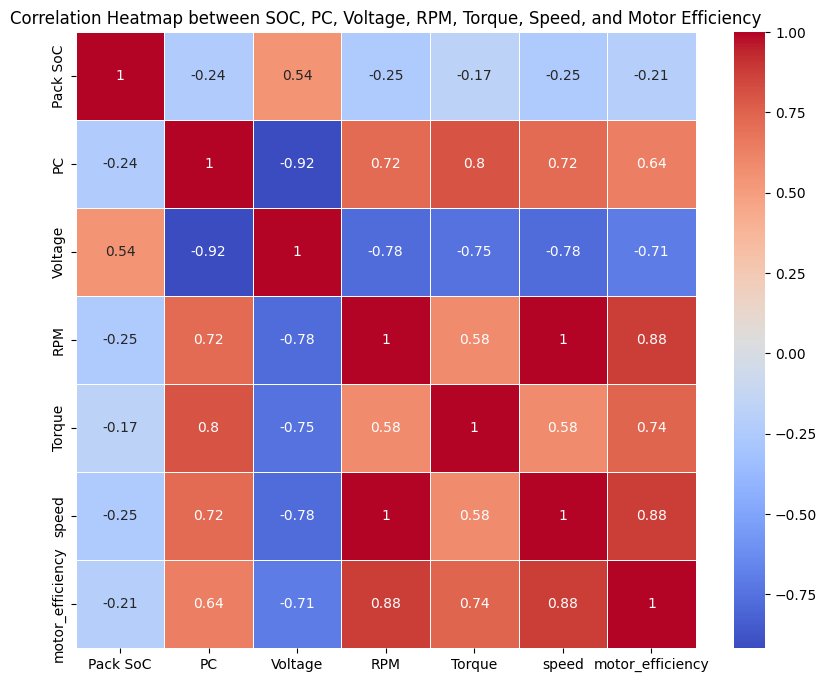

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Ishwari/Downloads/final_output_dataset.csv'  # Update this if the file path is different
df = pd.read_csv(file_path)

# Select the columns of interest
columns_of_interest = ['Pack SoC', 'PC', 'Voltage', 'RPM', 'Torque', 'speed', 'motor_efficiency']

# Ensure the columns exist in the dataframe
df_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap between SOC, PC, Voltage, RPM, Torque, Speed, and Motor Efficiency")
plt.show()


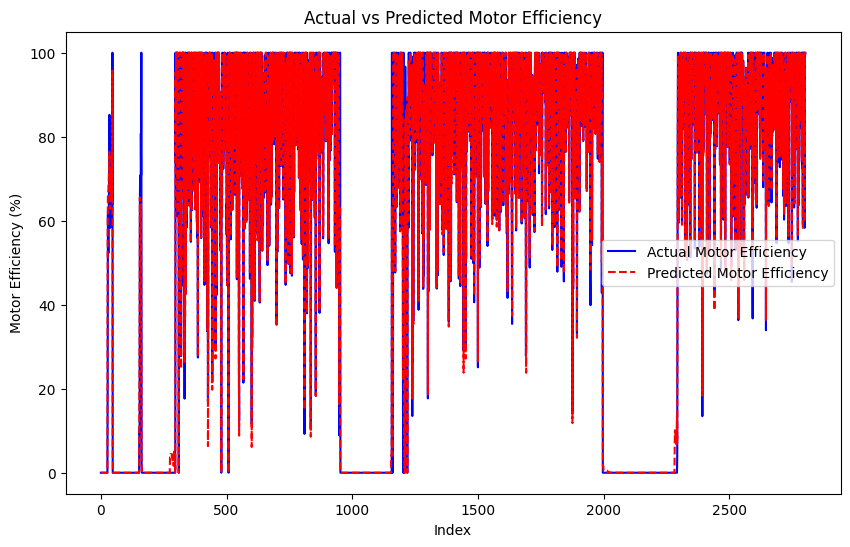

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/Ishwari/Downloads/final_output_dataset.csv')

# Clean up the column name
df = df.rename(columns={'motor_efficiency ': 'motor_efficiency'})

# Remove rows where motor_efficiency is NaN
df_clean = df.dropna(subset=['motor_efficiency'])

# Prepare features and target
X = df_clean[['Voltage', 'PC', 'Torque', 'RPM']].values
y = df_clean['motor_efficiency'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the model
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, learning_rate='adaptive', random_state=42, alpha=0.001)
model.fit(X_train_scaled, y_train)

# Predict motor efficiency
predicted_efficiency = model.predict(scaler.transform(X))

# Clip the predictions to ensure they are between 0 and 100
df_clean['Predicted Efficiency'] = np.clip(predicted_efficiency, 0, 100)

# Plot the Actual vs Predicted Motor Efficiency
plt.figure(figsize=(10, 6))
plt.plot(df_clean.index, df_clean['motor_efficiency'], label="Actual Motor Efficiency", color='blue')
plt.plot(df_clean.index, df_clean['Predicted Efficiency'], label="Predicted Motor Efficiency", color='red', linestyle='--')
plt.title("Actual vs Predicted Motor Efficiency")
plt.xlabel("Index")
plt.ylabel("Motor Efficiency (%)")
plt.legend()
plt.show()